# 6.4 Machine Learning Part 1

# Contents

### 1. Import data and libraries
### 2. Data cleaning 
### 3. Data wrangling
### 4. Regression analysis

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Display the graph without the need to "call" it specifically
%matplotlib inline

In [3]:
path = 'C:/Users/midov/Documents/Studies/Data Analysis/Immersion into Data Analytics/Achievement 6_Advanced Analytics & Dashboard Design/Causes of Death Analysis'

In [4]:
#Import data 
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data','df_merged_all3.csv'))

## 2. Data cleaning

In [5]:
df.shape

(7485, 41)

In [6]:
df.head()

,Unnamed: 0,Country,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,...,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths,Indicator,Sex,Age Group,Number,Death_indicator,Health_expedinture
0,0,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,409341.56,8.56,All,[All],140760,Low,Middle
1,1,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,269843.56,8.56,All,[0],1261,Low,Middle
2,2,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268813.56,8.56,All,[1-4],230,Low,Middle
3,3,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268718.56,8.56,All,[5-9],134,Low,Middle
4,4,Australia,2009,49,8064,1837,137,0,207,339,...,5186,266,12,268736.56,8.56,All,[10-14],151,Low,Middle


In [7]:
new_df=df.drop(['Unnamed: 0'], axis=1)

In [8]:
#Check for missing values
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     7485 non-null   object 
 1   Year                                        7485 non-null   int64  
 2   Meningitis                                  7485 non-null   int64  
 3   Alzheimer_s_Disease_and_Other_Dementias     7485 non-null   int64  
 4   Parkinson_s_Disease                         7485 non-null   int64  
 5   Nutritional_Deficiencies                    7485 non-null   int64  
 6   Malaria                                     7485 non-null   int64  
 7   Drowning                                    7485 non-null   int64  
 8   Interpersonal_Violence                      7485 non-null   int64  
 9   Maternal_Disorders                          7485 non-null   int64  
 10  HIV_AIDS    

##### Columns with missing values won't be used for regression analysis, can be disregarded

In [9]:
new_df.head()

,Country,Year,Meningitis,Alzheimer_s_Disease_and_Other_Dementias,Parkinson_s_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,Maternal_Disorders,...,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis,Total_no_of_Deaths,Indicator,Sex,Age Group,Number,Death_indicator,Health_expedinture
0,Australia,2009,49,8064,1837,137,0,207,339,18,...,5186,266,12,409341.56,8.56,All,[All],140760,Low,Middle
1,Australia,2009,49,8064,1837,137,0,207,339,18,...,5186,266,12,269843.56,8.56,All,[0],1261,Low,Middle
2,Australia,2009,49,8064,1837,137,0,207,339,18,...,5186,266,12,268813.56,8.56,All,[1-4],230,Low,Middle
3,Australia,2009,49,8064,1837,137,0,207,339,18,...,5186,266,12,268718.56,8.56,All,[5-9],134,Low,Middle
4,Australia,2009,49,8064,1837,137,0,207,339,18,...,5186,266,12,268736.56,8.56,All,[10-14],151,Low,Middle


In [10]:
#Check for duplicates
dups = new_df.duplicated()

In [11]:
dups.shape

(7485,)

C:\Users\midov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_no_of_Deaths', ylabel='Density'>

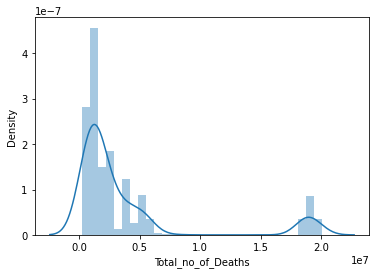

In [12]:
#Check the extreme values
sns.distplot(df['Total_no_of_Deaths'], bins=30)

In [13]:
#Check the mean
new_df['Total_no_of_Deaths'].mean() 

3737542.9355232297

In [14]:
#Check the median
new_df['Total_no_of_Deaths'].median() 

1682617.1

In [15]:
#Check the max
new_df['Total_no_of_Deaths'].max() 

20031914.07

## 3. Data wrangling (prep for regression analysis)

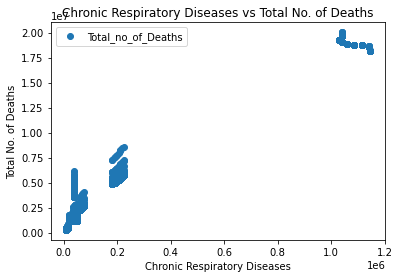

In [16]:
#Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
new_df.plot(x = 'Chronic_Respiratory_Diseases', y='Total_no_of_Deaths',style='o')
plt.title('Chronic Respiratory Diseases vs Total No. of Deaths')  
plt.xlabel('Chronic Respiratory Diseases')  
plt.ylabel('Total No. of Deaths')  
plt.show()

#### Hypothesis: the more number of Chronic Respiratory diseases, the more number of deaths a country has.

In [17]:
#Reshape the variables into NumPy arrays and put them into separate objects
X = new_df['Chronic_Respiratory_Diseases'].values.reshape(-1,1)
y = new_df['Total_no_of_Deaths'].values.reshape(-1,1)

In [18]:
X

array([[  8342],
       [  8342],
       [  8342],
       ...,
       [224988],
       [224988],
       [224988]], dtype=int64)

In [19]:
y

array([[ 409341.56],
       [ 269843.56],
       [ 268813.56],
       ...,
       [5918111.77],
       [6273763.77],
       [5738227.77]])

In [20]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [21]:
#Create a regression object
regression = LinearRegression()

In [22]:
#Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
#Predict the values of y using X
y_predicted = regression.predict(X_test)

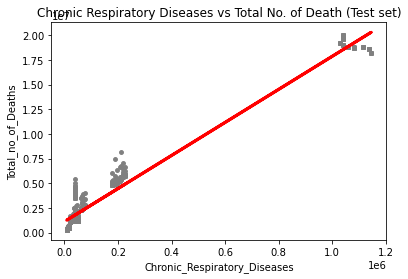

In [24]:
#Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Chronic Respiratory Diseases vs Total No. of Death (Test set)')
plot_test.xlabel('Chronic_Respiratory_Diseases')
plot_test.ylabel('Total_no_of_Deaths')
plot_test.show()

In [25]:
#Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [26]:
#Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[16.73466661]]
Mean squared error:  885089295567.4167
R2 score:  0.9683954615967514


##### Evoluation of performance of the model: The slope is positive, so the relationship is positive. This aligns with my hypothesis that the more number of Chronic Respiratory diseases, the more number of deaths a country has. However, the MSE is high at 885089295567, so the regression line is not a representation of the data. The R2 score of 0.96 represents a good fit.

In [27]:
y_predicted

array([[ 1738981.92070777],
       [18512372.54778533],
       [ 1263868.00102455],
       ...,
       [ 1501801.49086485],
       [18835803.44932869],
       [ 4889366.58309948]])

In [28]:
#Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1474393.38,1.738982e+06
1,19657139.98,1.851237e+07
2,278465.56,1.263868e+06
3,5891177.77,4.889367e+06
4,19657130.98,1.851237e+07
5,3877199.79,1.769422e+06
6,468558.72,1.358837e+06
7,1136476.84,1.866400e+06
8,2458859.98,2.211385e+06
9,1330221.55,1.673934e+06


##### There is a difference between the actual and predicted y values. 

### Compare how the regression fits the training set

In [29]:
#Predict
y_predicted_train = regression.predict(X_train)

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[16.73466661]]
Mean squared error:  909302000856.2947
R2 score:  0.9680929262604324


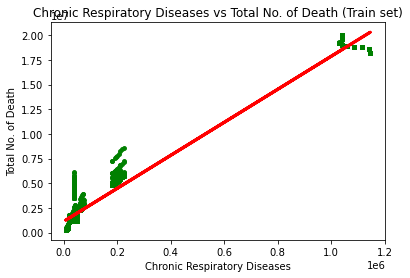

In [32]:
#Visualize the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Chronic Respiratory Diseases vs Total No. of Death (Train set)')
plot_test.xlabel('Chronic Respiratory Diseases')
plot_test.ylabel('Total No. of Death')
plot_test.show()

#### The values of the training set are similar to those of the test set. In spite of the fact that relationship is positive and R2 score of 0.96 represents a good fit,  this model is not viable for making predictions because of high MSE. The hypothesis is partially true.